# Project: Investigate a Dataset - [TMDb Movies]

<a id='intro'></a>
## Introduction

>**Name: Ikechukwu Chilaka**

>**Date: May 29, 2022**

>Investigating TMDB dataset that contains information of over 10k+ movies collected from 1960 to 2015

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb) from 1960 to 2015, The dataset has 21 columns and 10866 rows in all. The columns include: 

>**'id' and 'imdb_id':** which are unique identifiers of the movies, 

>**'popularity':** how popular the movie is amongst viewers; a metric that boosts search results [https://developers.themoviedb.org/3/getting-started/popularity]

>**'budget' and 'revenue':** the budjet and income without accounting for inflation 

>**'original_title'and 'cast':** the title of the movie and the lead actor(s)

>**'homepage':** website to see the movies landing page, 

>**'director', 'genres', 'production_companies':** info on the name of the directors, the movie genre, and production companies

>**'tagline':** short text which serves to clarify an idea for, or is designed with a form of, dramatic effect. 

>**'keywords':** keywords associated with the movie to allow for easy search, 

>**'overview':** brief plot summary

>**'release_year':** year of movie release, **'release_date':** date of release **'runtime':** duration of movie in mins

>**'budget_adj', and 'revenue_adj':** show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

>**vote_count** represents the number of users who voted while **vote_average:** what the voters voted on a scale on 1-10
[https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#]


### Question(s) for Analysis
**Primary question: What properties of the movie data given affects the income made from the movie?**

>**Does the length of the movie affect the movie's  profitability?**

Producers would need this to encourage screen writers to write more scenes or not

>**Do movies with better more user engagement mean more income?**

a.What genre are these movies?

b.The day which the movie is  released (weekend or weekday) could also affect views


In [1]:
#Set the working environment. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Upgrading pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
>**I will check the datasets and figure out what needs cleaning and trimming**

In [3]:
# Load the data and view the first five rows
df = pd.read_csv('tmdb-movies.csv', sep =",")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I will view the basic info about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

I have seen that release date is not in datetime, I will have to convert it.
Also observed null values in the columns

In [5]:
#Do the movie entries have unique IDs?
df['id'].nunique()

10865

One row repeats itself

Do the movie entries have unique database IDs?

In [6]:
df['imdb_id'].nunique()

10855

11 duplicates. id will be a better identifier

In [7]:
#viewing summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Wow! looking at minimum value, runtime cannot be zero. It means there was no movie at all. 

Why would movies have zero budget Could a movie make nothing as revenue?

Min and Max of vote_average is [1.5, 9.2]. It seems it is on a 10-scale

In [8]:
#Find places where runtime is zero
zero_runtime = df[df.runtime == 0]
zero_runtime.shape[0]

31

There are 31 instances of zero runtime

In [9]:
#See where fields are null
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

So many blank fields...
Let me take a look

In [10]:
df[df['production_companies'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,...,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.000000e+00,0.000000e+00
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
295,363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,...,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.000000e+00,0.000000e+00
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
328,308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.000000e+00,0.000000e+00
370,318279,tt2545428,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,http://www.merufilm.com/,Jimmy Chin|Elizabeth Chai Vasarhelyi,NaN,...,Meru is the electrifying story of three elite ...,89,Adventure|Documentary,NaN,1/25/15,42,6.9,2015,0.000000e+00,2.147489e+06
374,206197,tt1015471,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,http://www.thesisterhoodofnight-movie.com/,Caryn Waechter,The Salem Witch Trials remixed.,...,When a teenage girl says she's the victim of a...,104,Mystery|Drama|Thriller,NaN,4/10/15,25,6.6,2015,0.000000e+00,0.000000e+00
382,306197,tt4145304,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,NaN,Kris Swanberg,No one is ever really prepared.,...,An inner-city high school teacher discovers sh...,90,Drama|Comedy,NaN,7/24/15,22,5.7,2015,0.000000e+00,0.000000e+00
388,323967,tt2016335,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,NaN,Anna Mastro,Heaven or hell. It's in his hands.,...,A ticket-taker at the local cinema believes he...,87,Drama|Comedy,NaN,3/13/15,12,5.2,2015,6.439997e+05,0.000000e+00
393,343284,tt3602128,0.283194,2000000,0,Night Of The Living Deb,Maria Thayer|Chris Marquette|Ray Wise|Michael ...,NaN,Kyle Rankin,NaN,...,After a one night stand Deb wakes up in the mi...,85,Comedy|Horror,NaN,8/29/15,13,5.7,2015,1.839999e+06,0.000000e+00


#Null values have 'NaN' in their place

Okay, here are a few things I would do to clean the data
1. Remove duplicates
2. Drop unwanted columns: 

a. imdb_id, tagline, keywords, overview etc as I will not be needing the texts in my analysis

b. budget and revenue. I would also calculate any financial data based on the adjusted values 

3. Drop where runtime is zero
4. Treat null values
5. Rename columns
6. Convert release_day to datetime datatype
7. Create new columns - movie_income and release_day

### Data Cleaning 
>**I will provide stepwise actions to the prepearation of the dataset for analysis and visualizations**

**1. Remove duplicates**

In [11]:
df.duplicated().sum()

1

One duplicate exists. Remove duplicate and check reconfirm

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

zero duplicates now

**2. Drop unwanted columns in new dataframe called df2 and view to reconfirm**

In [13]:
df2 = df.drop(['tagline','keywords','overview', 'budget','revenue','imdb_id','original_title',\
              'cast','homepage','director','production_companies'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
id              10865 non-null int64
popularity      10865 non-null float64
runtime         10865 non-null int64
genres          10842 non-null object
release_date    10865 non-null object
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
budget_adj      10865 non-null float64
revenue_adj     10865 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 933.7+ KB


we now have 10 columns

**3. Drop where runtime is zero and reconfirm**

In [14]:
df2.drop(df2[df2.runtime == 0].index, inplace=True)
df2[df2.runtime == 0].count().sum()

0

they have been removed

**4. Treat null values**

I will now fill the null values of genres with "not_given" and reconfirm

In [15]:
df2.fillna('not_given', inplace=True)
df2.isnull().sum()

id              0
popularity      0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

We now have zero null values in all columns

**5. Rename columns**

In [16]:
#rename the adjusted columns to something simpler and reconfirm
df2.rename(columns={'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
df2.columns

Index(['id', 'popularity', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget', 'revenue'],
      dtype='object')

**6. Convert release_day to datetime datatype and reconfirm**

In [17]:
df2['release_date']=pd.to_datetime(df2['release_date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 10 columns):
id              10834 non-null int64
popularity      10834 non-null float64
runtime         10834 non-null int64
genres          10834 non-null object
release_date    10834 non-null datetime64[ns]
vote_count      10834 non-null int64
vote_average    10834 non-null float64
release_year    10834 non-null int64
budget          10834 non-null float64
revenue         10834 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 931.0+ KB


**7. Create new columns - movie_income and release_day**

Let me first calculate the column for movie_income which will be (revenue - budget)

In [18]:
df2['movie_income'] = df2['revenue'] - df2['budget']

Then a new column to extract the day of release from the date

In [19]:
df2['release_day']=df2['release_date'].dt.day_name()
#view both changes
df2.head()

,id,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue,movie_income,release_day
0,135397,32.985763,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Tuesday
1,76341,28.419936,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Wednesday
2,262500,13.112507,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Wednesday
3,140607,11.173104,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,Tuesday
4,168259,9.335014,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,Wednesday


<a id='intro'></a>
## Exploratory Data Analysis
>**With my data cleaned, I will now compute statistics and create visualization to answer the research questions

In [20]:
#Let me view the summary stat again to get an overview
df2.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,movie_income
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04,1.083400e+04,1.083400e+04
mean,65750.128854,0.647762,102.363855,217.962064,5.976343,2001.295274,1.759896e+07,5.151599e+07,3.391703e+07
std,91819.986178,1.001204,30.948225,576.370933,0.935047,12.819708,3.434421e+07,1.448190e+08,1.253850e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10586.250000,0.208536,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20551.000000,0.384690,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75055.000000,0.715448,112.000000,146.000000,6.600000,2011.000000,2.094246e+07,3.389667e+07,1.312114e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


The min movie_income is negative showing loss
Over 50% of the dataset have zero budget and zero revenue. That's a lot of missing or zero data

Let me even check what % of the dataset have revenue or budget as zero

In [21]:
((df2['budget'].eq(0).sum() | df2['revenue'].eq(0).sum())/df.shape[0])*100

55.1219512195122

That means over 55% of our income calculation is based on this error

**Visualizations**

>**Does the length of the movie affect the movie's  profitability?**

**UNIVARIATE PLOT** to see the distribution of movieruntime

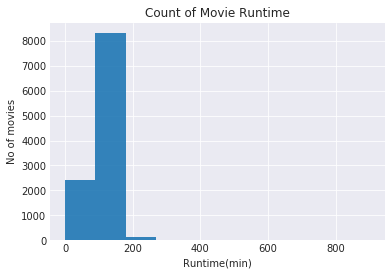

In [22]:
#Let me see the number of movies and their runtime in a histogram
df.runtime.hist(alpha=0.9)
plt.title("Count of Movie Runtime") #set title
plt.xlabel("Runtime(min)") #set x-label
plt.ylabel("No of movies") #set y-label
plt.show()

Most of the movies have runtime >100 and <200

Now, does the length of the movie affect its profitablity?

Let me prepare a sactter plot to compare the two variables

Firstly, most of the movies have runtime 100 mins and above. I would like to zoom in on them before making conclusions

To do this, I will create new dataframes to return where runtime <=200 and income is >0

In [23]:
df3=df2[(df2.runtime >=100)] # create new dataframe
df4=df3[(df3.movie_income>0)] #just to remove zero profit movies for a clearer view

Then I will plot the both the regular and the zoom in

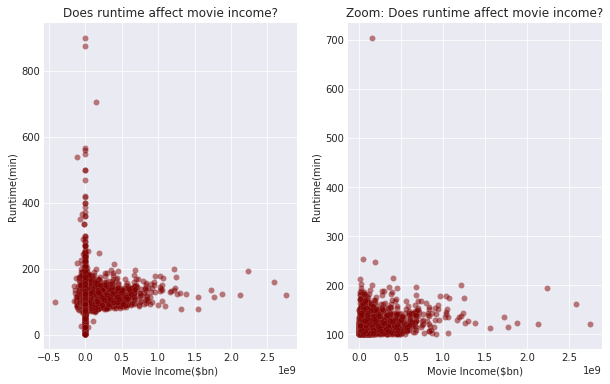

In [24]:
xa = df2['movie_income']
ya = df2['runtime']
xb = df4['movie_income']
yb = df4['runtime']

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].set_title("Does runtime affect movie income?")
ax[0].set_xlabel("Movie Income($bn)")
ax[0].set_ylabel("Runtime(min)")

ax[1].set_title("Zoom: Does runtime affect movie income?")
ax[1].set_xlabel("Movie Income($bn)")
ax[1].set_ylabel("Runtime(min)")

ax[0].scatter(xa,ya, alpha=0.5, color='maroon', edgecolors='white', linewidths=0.1)
ax[1].scatter(xb,yb, alpha=0.5, color='maroon',edgecolors='white', linewidths=0.1)
plt.show()

The regular plot reconfirms most movie lengths are below 200minutes. It is hard to see a correlation

The zoom in reveals some sort of uniform increase. I will like to check this with Pearson coefficient which ranges from +1(positive correlation) to -1(negative correlation)

In [25]:
df4['movie_income'].corr(df4['runtime']) #checking with Pearson coefficient

0.23040820595159775

The correlation is positive but low. Longer movies do not necessarily mean they would be profitable.  

Furthermore, I can check with the popularity of the movies with respect to their runtime.

If runtime does not speak to profit, what does it speak to? And does this in turn speak to profit?

What length of movies are more popular: long or short?

Does popularity make a movie profitable? Let me visualize

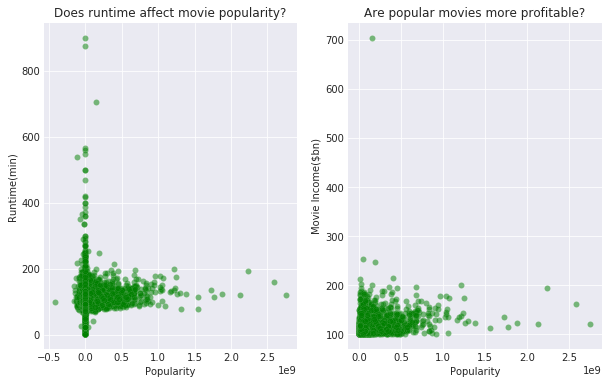

In [26]:
xc = df2['popularity']
yc = df2['runtime']
xd = df2['popularity']
yd = df2['movie_income']

#checking  runtime and popularity
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].set_title("Does runtime affect movie popularity?")
ax[0].set_xlabel('Popularity')
ax[0].set_ylabel("Runtime(min)")

#popularity of the movies with respect to their income.
ax[1].set_title('Are popular movies more profitable?')
ax[1].set_xlabel('Popularity')
ax[1].set_ylabel('Movie Income($bn)')

ax[0].scatter(xa,ya, alpha=0.5, color='green', edgecolors='white', linewidths=0.1)
ax[1].scatter(xb,yb, alpha=0.5, color='green',edgecolors='white', linewidths=0.1)
plt.show()

From the first plot, I can see that longer runtime tend to have low or zero popularity. Viewers will tend to watch movies that are at below 200min

we can see that movie income increases with popularity generally fairly. But et me confirm this correlation using Pearson correlation which ranges from +1 to -1

In [27]:
df2['movie_income'].corr(df2['popularity'])

0.5627965618029979

A positive correlation confirms they increase in same direction. And 0.56 is tending towards +1 fairly

### Research Question 2  (Do movies with better more user engagement mean more income)

I would need to grouby genre, but this can only work if I split the strings contained as there are more than one genre for a movie and are separated with (|)

In [28]:
#split genre and view
df5=df2.assign(genres=df2.genres.str.split('|')).explode('genres')
df5.head()

,id,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue,movie_income,release_day
0,135397,32.985763,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Tuesday
0,135397,32.985763,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Tuesday
0,135397,32.985763,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Tuesday
0,135397,32.985763,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Tuesday
1,76341,28.419936,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Wednesday


Let me first see what genre was produced the most and then see if these genres have good user engagement

In [29]:
df5a =df5.groupby(['genres'])['genres'].count().sort_values(ascending=False)
df5a.head()

genres
Drama       4751
Comedy      3782
Thriller    2905
Action      2382
Romance     1705
Name: genres, dtype: int64

Drama, Comedy and Thriller are the most produced. Action follows behind.

I will be measuring user engagement by popularity and votes. Now let me see if Drama, Comedy and Thriller have good engagement

**BECAUSE I WILL BE USING THE GROUPBY FUNCTION (MEAN) REPEATEDLY, LET ME DEFINE IT FOR REUSE**

In [30]:
def group_view():
    data = source.groupby([x])[y].mean().sort_values(ascending=False)
    return data

#First, I will group by avaerage popularity by genres
source=df5
x='genres'
y='popularity'
group_view()

genres
Adventure          1.153768
Science Fiction    1.002023
Fantasy            0.991874
Action             0.926235
Animation          0.852182
Family             0.787579
Crime              0.745410
Thriller           0.741917
War                0.727683
Mystery            0.691659
Romance            0.594030
Comedy             0.593997
Drama              0.592374
Western            0.590615
History            0.575936
Music              0.493940
Horror             0.466995
TV Movie           0.273758
Foreign            0.192147
Documentary        0.181698
not_given          0.171879
Name: popularity, dtype: float64

Oops! Adventure, Science Fiction, Fantasy, and Action are the tops

Well, perhaps they have good votes even though they are not popular

So let me check votes for each genre

In [31]:
#Viewer votes for each genre --- use function group_view()
source=df5
x='genres'
y='vote_average'
group_view()

genres
Documentary        6.915280
Music              6.484289
not_given          6.450000
History            6.410479
Animation          6.403147
War                6.297778
Drama              6.165839
Crime              6.125351
Western            6.083030
Romance            6.045044
Family             5.999186
Foreign            5.982888
Mystery            5.951485
Adventure          5.940952
Comedy             5.905579
Fantasy            5.864044
TV Movie           5.797561
Action             5.787951
Thriller           5.751979
Science Fiction    5.666694
Horror             5.340270
Name: vote_average, dtype: float64

It's hard to say. The votes for each genre are quite close. Recall that the standard deviation for votes is even less than 1

I think most voters on IMDB may not even watch before voting. Probably just read the overview and the click to vote

Hmmmm...Let me check with the number of voters for each genre with a bar plot. More voters would mean more viewers(assumption)

In [32]:
#Voters per genre group ----use function group_view()
source=df5
x='genres'
y='vote_average'
df9 =group_view()

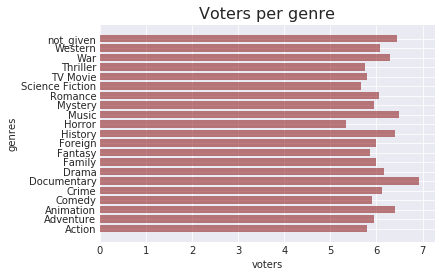

In [33]:
#Plot to view the voters per genre
x9=df9.index
y9=df9.values
title9=('Voters per genre')
x9label=('voters')
y9label=('genres')
plt.barh(x9, y9, alpha=0.5, color='maroon')
plt.title(title9, size=16)
plt.xlabel(x9label)
plt.ylabel(y9label)
plt.show()

I have now seen that Adventure, SciFi, Fantasy, and Action have better engagement by viewers. A confirmation!

Now, are these movies that are popular with users released on certain days? Perhaps, on days that we can go to the cinemas
I will group genres by release day

In [34]:
# group genres by release day
df10=(df5.groupby(['genres'])['release_day'].value_counts()).to_frame() #counts the number of movies in that day
df10.head()

release_day
genres release_day             
Action Friday               879
       Thursday             441
       Wednesday            339
       Tuesday              333
       Monday               145

I will make a vertical barplot to see this clearly

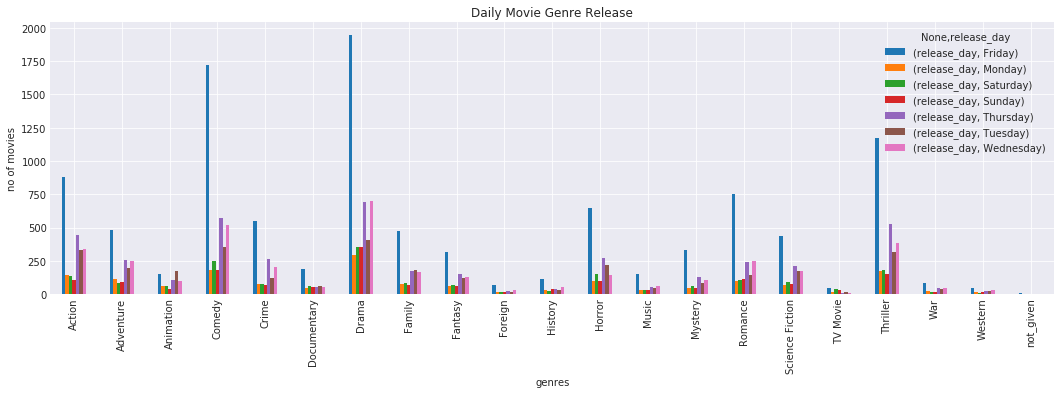

In [35]:
x=df10.index   
y=df10.values
df10.unstack('release_day').plot.bar(figsize=(18,5)) 
plt.title('Daily Movie Genre Release')
plt.xlabel('genres')
plt.ylabel('no of movies')
plt.show()

I can see that most releases were on Fridays for all genres. Makes sense, Fridays are for movie nights, lol.

So this rules out my 'release_day' theory

So far, I have gathered that the most produced genre are: (Drama, Comedy, Thriller, Action)

And the most popular amongst viewers are: (Adventure, SciFi, Fantasy, Action)

**So which ones are most profitable? Lets dive in! I will create a dataframe of movies with the genres in question**

In [36]:
#A dataframe of the select genres
df11 = df5.loc[df['genres'].isin(['Drama', 'Comedy', 'Thriller','Action','Adventure', 'Science Fiction', 'Fantasy'])]
#let me confirm if this has been done
df11.genres.unique()

array(['Action', 'Comedy', 'Drama', 'Thriller', 'Adventure',
       'Science Fiction', 'Fantasy'], dtype=object)

In [37]:
#Now let me try to compare the genres and the income using a violinplot

Text(0.5,1,'Income from movie genres')

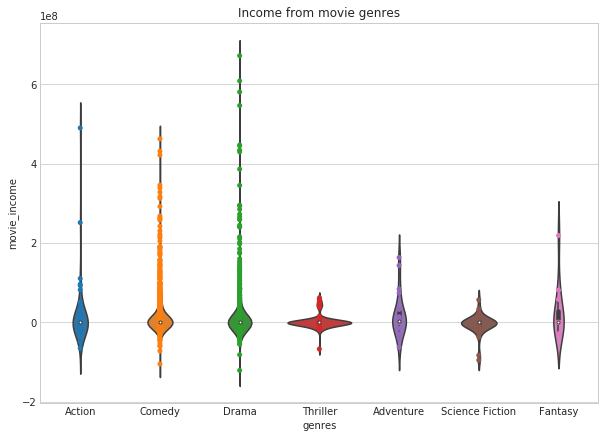

In [38]:
a=df11['genres']
b=df11['movie_income']
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.stripplot(a,b)
sns.violinplot(a,b)
plt.title('Income from movie genres')

For clarity, I will prepare a dataframe that has the total income and average income of each genre

To do this, I will:

Group total income by genre

Then group average income by genre

And merge them

In [39]:
#Group total income by genre
df12=df11.groupby(['genres'],as_index=False)['movie_income'].sum()
df12

,genres,movie_income
0,Action,1.001096e+09
1,Adventure,4.266217e+08
2,Comedy,1.717137e+10
3,Drama,1.376784e+10
4,Fantasy,3.288099e+08
5,Science Fiction,-1.731430e+08
6,Thriller,2.240557e+08


In [40]:
#Group average income by genre
df13=df11.groupby(['genres'],as_index=False)['movie_income'].mean()
df13

,genres,movie_income
0,Action,1.589040e+07
1,Adventure,1.939190e+07
2,Comedy,2.421915e+07
3,Drama,1.933685e+07
4,Fantasy,2.989181e+07
5,Science Fiction,-4.809528e+06
6,Thriller,2.409201e+06


In [41]:
#merge them
pd.merge(df12,df13,on='genres')

,genres,movie_income_x,movie_income_y
0,Action,1.001096e+09,1.589040e+07
1,Adventure,4.266217e+08,1.939190e+07
2,Comedy,1.717137e+10,2.421915e+07
3,Drama,1.376784e+10,1.933685e+07
4,Fantasy,3.288099e+08,2.989181e+07
5,Science Fiction,-1.731430e+08,-4.809528e+06
6,Thriller,2.240557e+08,2.409201e+06


>**Some Inferences**

-Box office saw a loss producing SciFi. Probably because it is common amongst young people who could still be dependants.

-Comedy and drama are highly produced. The distribution of points are close as they move upward from the mean. This means that 
the genres are sure bankers to bring income and are not one-time wonders like Adventure with skinny violin on every end.

-Adventure profit is probably due to only a couple of movies

-Thriller did not have the best profit yielding movies, but the income from the movies were close. This means that the income from Thrillers can be predicted before shooting, this way budget and spending can be informed properly

-Fantasy was the least produced movie but the distribution of points are almost centered

-Action has a few outliers, but most points are around the mean

<a id='conclusions'></a>
## Conclusions

>**Does the length of the movie affect the movie's  profitability?**

Although I can't say that length of movie affects profitability directly. We can seee that longer movies are not popular amongst viewers, and we can also see that popular movies tend to be profitable.

Generally speaking, movies in the range of 100 to 125mins showed more popularity

>**Do movies with better more user engagement mean more income?**

**a.What genre are these movies?**

I discovered that the popular genres are not being produced much, because of this, it was difficult to draw conclusions on them as their size was small. But Fantasy and Action are really unexplored genres as they show promise

Most produced genre(Drama, Comedy, Thriller, Action), 

Most popular amongst viewers: (Adventure, SciFi, Fantasy, Action)

**b.The day which the movie is  released (weekend or weekday) could also affect user engagement**

Most movies are released on Friday. This was observed across the genres

>**Limitations**
More than half of this dataset has income calculation as zero. My analysis was based on this error as the rows were too many to drop

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0